In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score ,roc_curve , roc_auc_score 


In [8]:
wine_data = pd.read_csv(r'Downloads\winedata.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [9]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [10]:
wine_data['quality'] = wine_data.groupby(['alcohol', 'citric acid'])['quality'].apply(lambda x : x.fillna(x.median()))

In [11]:
wine_data['pH'] = wine_data.groupby(['alcohol', 'quality'])['pH'].apply(lambda x : x.fillna(x.median()))

In [12]:
wine_data['total sulfur dioxide'] = wine_data.groupby(['free sulfur dioxide'])['total sulfur dioxide'].apply(lambda x : x.fillna(x.median()))

In [13]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [14]:
scaler = MinMaxScaler()
scaled_wine = scaler.fit_transform(wine_data)
scaled_wine = pd.DataFrame(scaled_wine , columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'])

In [15]:
scaled_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.663793,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.396552,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.448276,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.362069,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.663793,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.672414,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.672414,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.672414,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.672414,0.227545,0.276923,0.4


In [16]:
scaled_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
scaled_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142868,0.490211,0.653965,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116134,0.138571,0.069244,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.672414,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.672414,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.672414,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


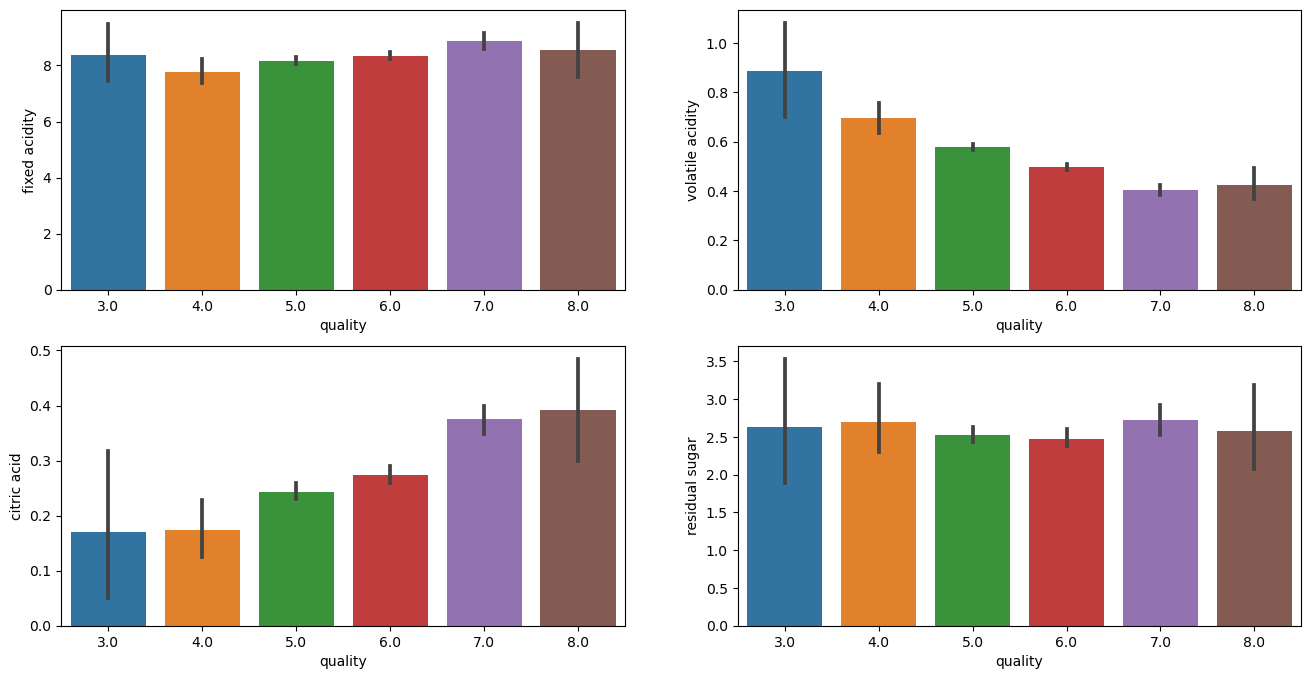

In [18]:
fig ,ax = plt.subplots(2,2,figsize=(16,8))
sns.barplot(x='quality' , y= 'fixed acidity' , data = wine_data , ax=ax[0,0])
sns.barplot(x='quality' , y = 'volatile acidity' , data = wine_data, ax=ax[0,1])
sns.barplot(x='quality' , y = 'citric acid' , data = wine_data , ax=ax[1,0])
sns.barplot(x='quality' , y = 'residual sugar' , data = wine_data , ax=ax[1,1])
plt.show()

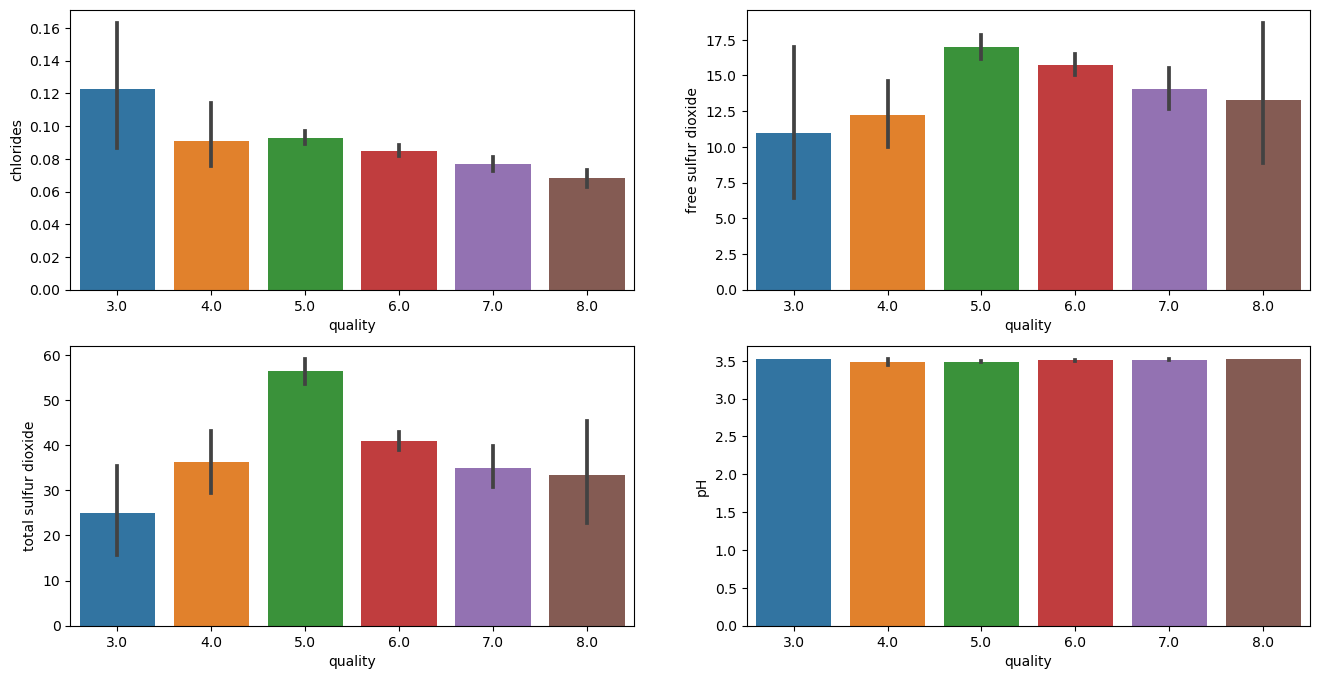

In [19]:
fig ,ax = plt.subplots(2,2,figsize=(16,8))
sns.barplot(x='quality' , y= 'chlorides' , data = wine_data , ax=ax[0,0])
sns.barplot(x='quality' , y = 'free sulfur dioxide' , data = wine_data , ax=ax[0,1])
sns.barplot(x='quality' , y = 'total sulfur dioxide' , data = wine_data , ax=ax[1,0])
sns.barplot(x='quality' , y = 'pH' , data = wine_data , ax=ax[1,1])
plt.show()

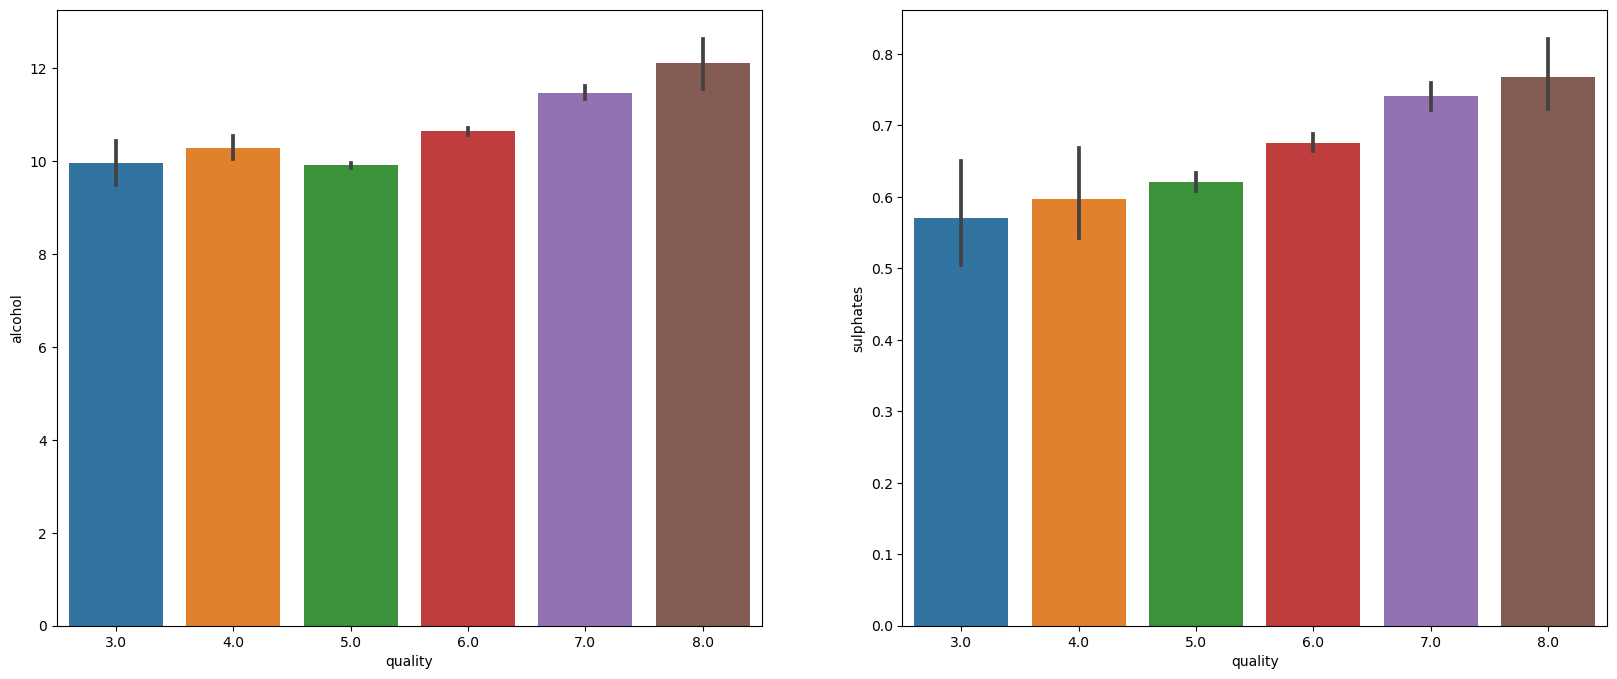

In [20]:
fig ,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='quality' , y= 'alcohol' , data = wine_data , ax=ax[0])
sns.barplot(x='quality' , y = 'sulphates' , data = wine_data , ax=ax[1])
plt.show()

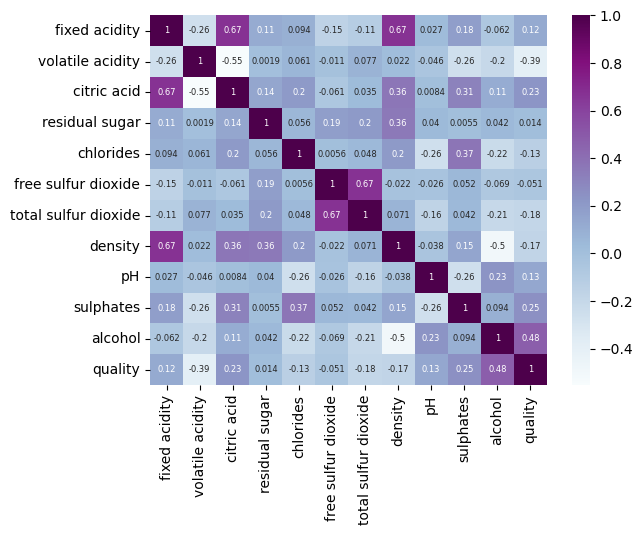

In [21]:
wine_corr = scaled_wine.corr()
sns.heatmap(wine_corr , annot = True , annot_kws={'size': 6}, cmap = 'BuPu')
plt.show()

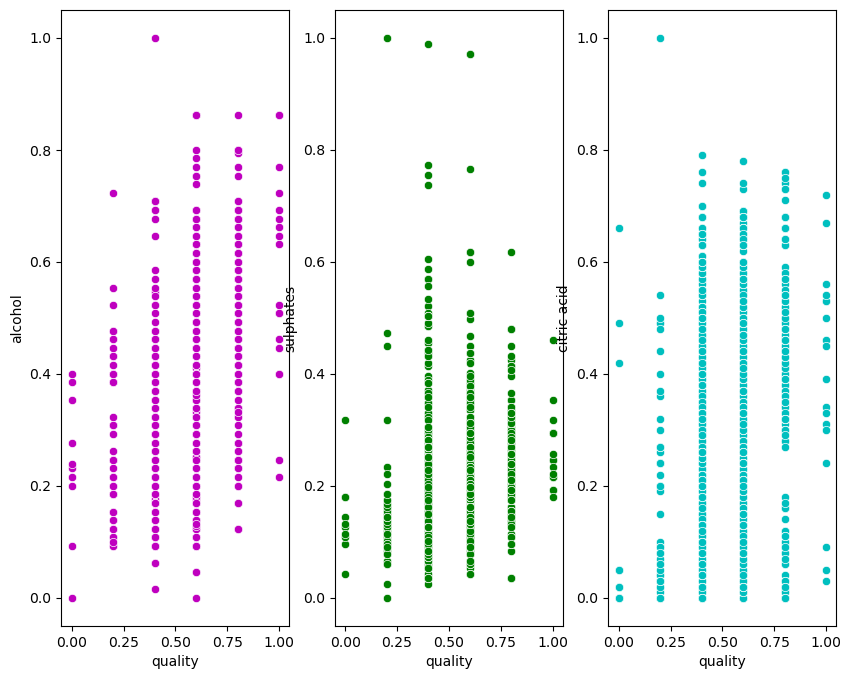

In [22]:
fig , ax = plt.subplots(1,3,figsize=(10,8))
sns.scatterplot(x = 'quality' , y = 'alcohol', data = scaled_wine , ax=ax[0] , color ='m')
sns.scatterplot(x = 'quality' , y = 'sulphates', data = scaled_wine , ax=ax[1] , color ='g')
sns.scatterplot(x = 'quality' , y = 'citric acid', data = scaled_wine , ax=ax[2], color ='c')
plt.show()

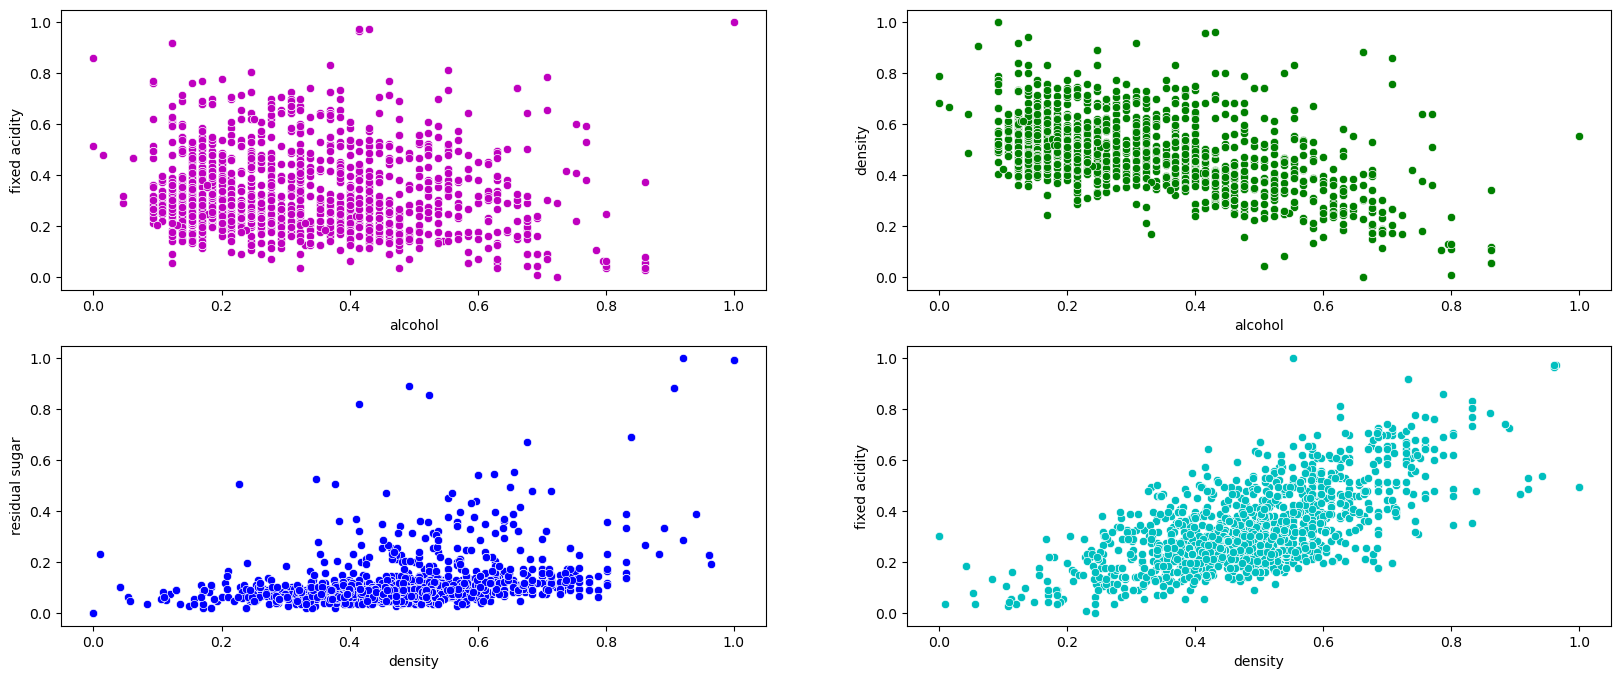

In [23]:
fig , ax = plt.subplots(2,2,figsize = (20,8))
sns.scatterplot(x = 'alcohol' , y = 'fixed acidity', data = scaled_wine,color ='m' , ax=ax[0,0] )
sns.scatterplot(x = 'alcohol' , y = 'density', data = scaled_wine,color ='g' , ax=ax[0,1])
sns.scatterplot(x = 'density' , y = 'residual sugar', data = scaled_wine,color ='blue' , ax=ax[1,0])
sns.scatterplot(x = 'density' , y = 'fixed acidity', data = scaled_wine,color ='c' , ax=ax[1,1] )
plt.show()

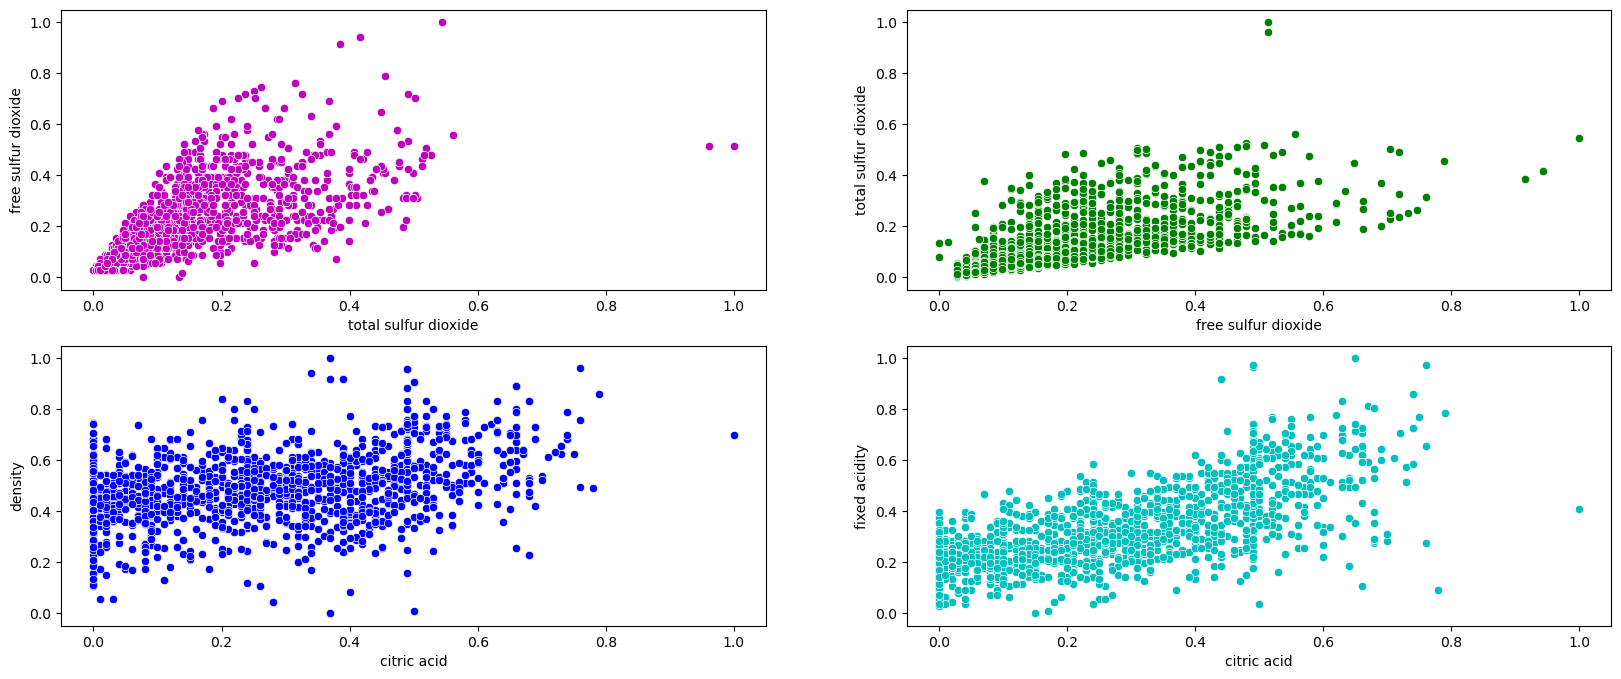

In [24]:
fig , ax = plt.subplots(2,2,figsize = (20,8))
sns.scatterplot(x = 'total sulfur dioxide' , y = 'free sulfur dioxide', data = scaled_wine,color ='m' , ax=ax[0,0] )
sns.scatterplot(x = 'free sulfur dioxide' , y = 'total sulfur dioxide', data = scaled_wine,color ='g' , ax=ax[0,1])
sns.scatterplot(x = 'citric acid' , y = 'density', data = scaled_wine,color ='blue' , ax=ax[1,0])
sns.scatterplot(x = 'citric acid' , y = 'fixed acidity', data = scaled_wine,color ='c' , ax=ax[1,1] )
plt.show()

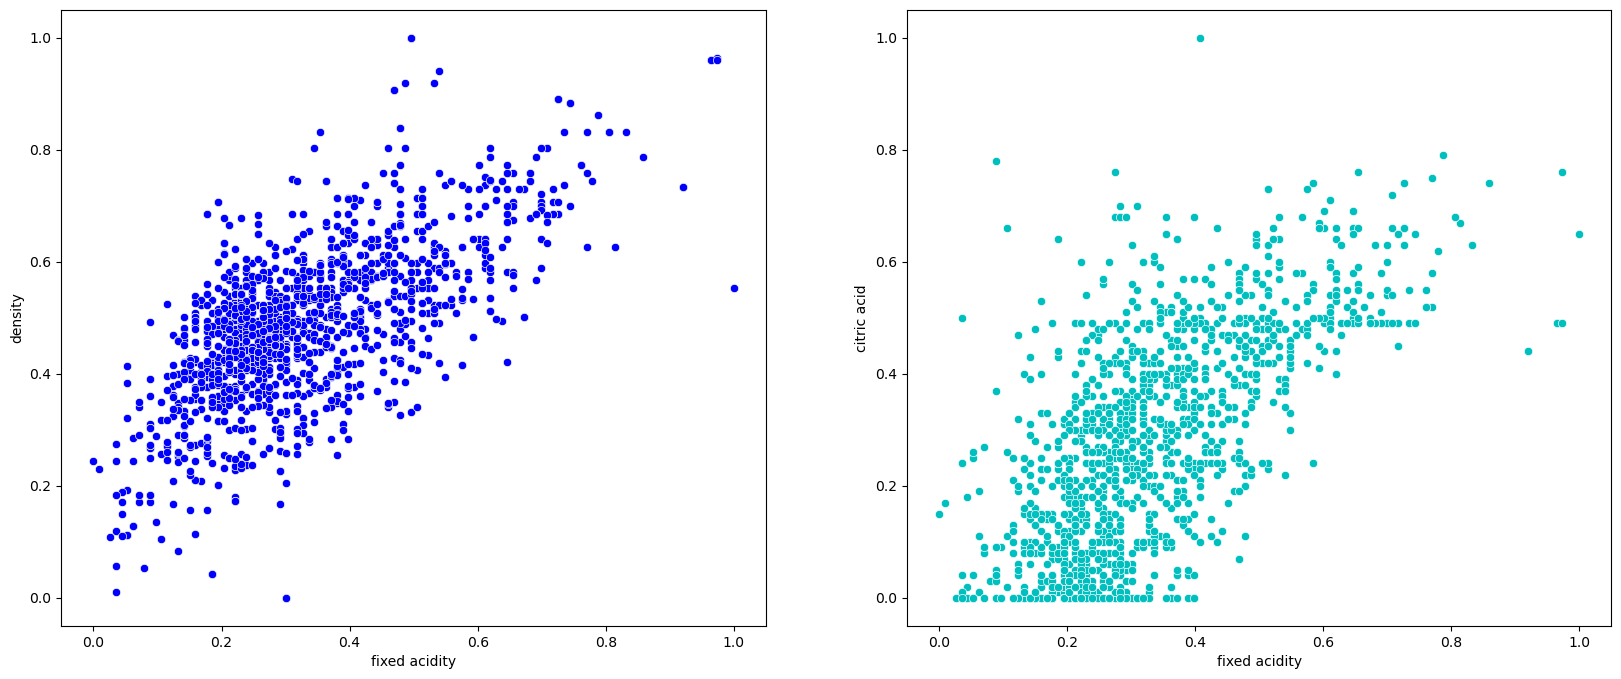

In [25]:
fig , ax = plt.subplots(1,2,figsize = (20,8))
sns.scatterplot(x = 'fixed acidity' , y = 'density', data = scaled_wine,color ='blue' , ax=ax[0])
sns.scatterplot(x = 'fixed acidity' , y = 'citric acid', data = scaled_wine,color ='c' , ax=ax[1] )
plt.show()

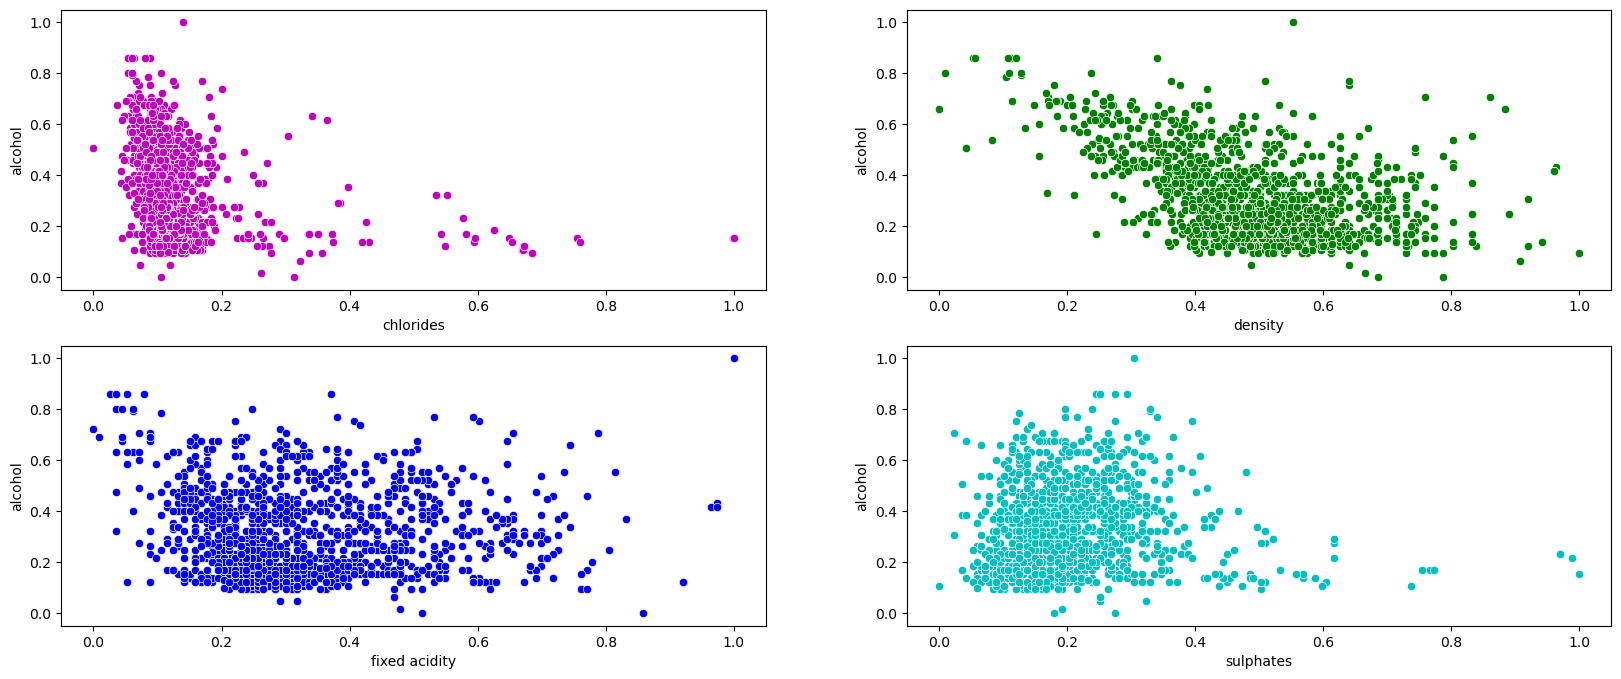

In [26]:
fig , ax = plt.subplots(2,2,figsize = (20,8))
sns.scatterplot(x = 'chlorides' , y = 'alcohol', data = scaled_wine,color ='m' , ax=ax[0,0] )
sns.scatterplot(x = 'density' , y = 'alcohol', data = scaled_wine,color ='g' , ax=ax[0,1])
sns.scatterplot(x = 'fixed acidity' , y = 'alcohol', data = scaled_wine,color ='blue' , ax=ax[1,0])
sns.scatterplot(x = 'sulphates' , y = 'alcohol', data = scaled_wine,color ='c' , ax=ax[1,1] )
plt.show()

In [109]:
#INFERENCES FROM THE SCATTER PLOTS
#POSITIVE CORRELATION IS IDENTIFIED WHEN TWO VARIABLES ARE DIRECTLY PROPOTIONAL TO EACH OTHER
 #i.e. WHEN THE VALUE OF INDEPENDENT VARIABLE INCREASES , THE VALUE OF DEPENDENT VARIABLE INCREASES AS WELL AND LIKEWISE.

#NEGATIVE CORRELATION IS IDENTIFIED WHEN TWO VARIABLES ARE INDIRECTLY PROPOTIONAL TO EACH OTHER
 #i.e. WHEN THE VALUE OF INDEPENDENT VARIABLE INCREASES , THE VALUE OF DEPENDENT VARIABLE DECREASES AS WELL AND LIKEWISE.

    
#1 --> Quality increases when sulphates and citric acid content increases , and has the highest quality when alcohol content incereases.
#2 --> When alcohol content increases , the density of the wine decreases
#3 --> Alcohol content is not affected by fixed acidity
#4 --> When the density of the wine increases , the residual sugar slightly increases
#5 --> When the wine is more dense , it means that it has high fixed acidity
#6 --> When the citric acid content of the wine increases , the wine is more dense 
#7 --> When the citric acid content of the wine increases , the acidity level of the wine also increases
#8 --> When the fixed acidity level of the wine increases , the wine is more dense and has high citric acid content
#9 --> When the density of the wine increases , the alcohol content of the wine  decreases
#10 --> Alcohol content is not affected by fixed acidity and sulphates 
#10 --> Since volatile acidity is highly negatively correlated with quality,we shall drop the column before further analysis
        #(#Quality is tremendously affected by the volatile acidic nature of the wine)
#11 --> From scatter plots , it can also be inferred that the dataset has numerous outliers

In [110]:
scaled_wine.drop('pH', axis=1 , inplace = True )
scaled_wine.drop('volatile acidity', axis = 1, inplace=True)

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


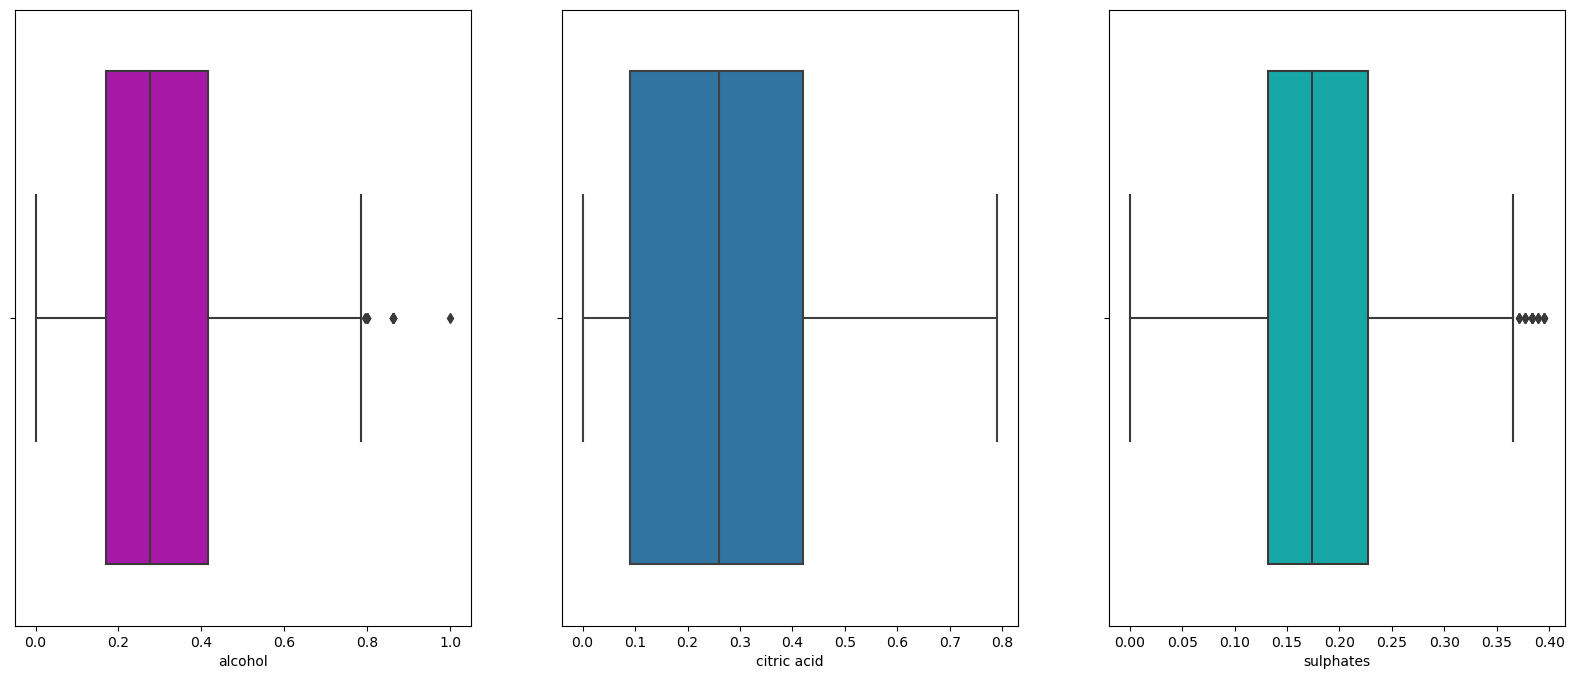

In [111]:
fig , ax = plt.subplots(1,3,figsize=(20,8))
sns.boxplot(scaled_wine['alcohol'] , ax = ax[0] , color = 'm')
sns.boxplot(scaled_wine['citric acid'] , ax= ax[1])
sns.boxplot(scaled_wine['sulphates'] , ax= ax[2] , color ='c')
plt.show()

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


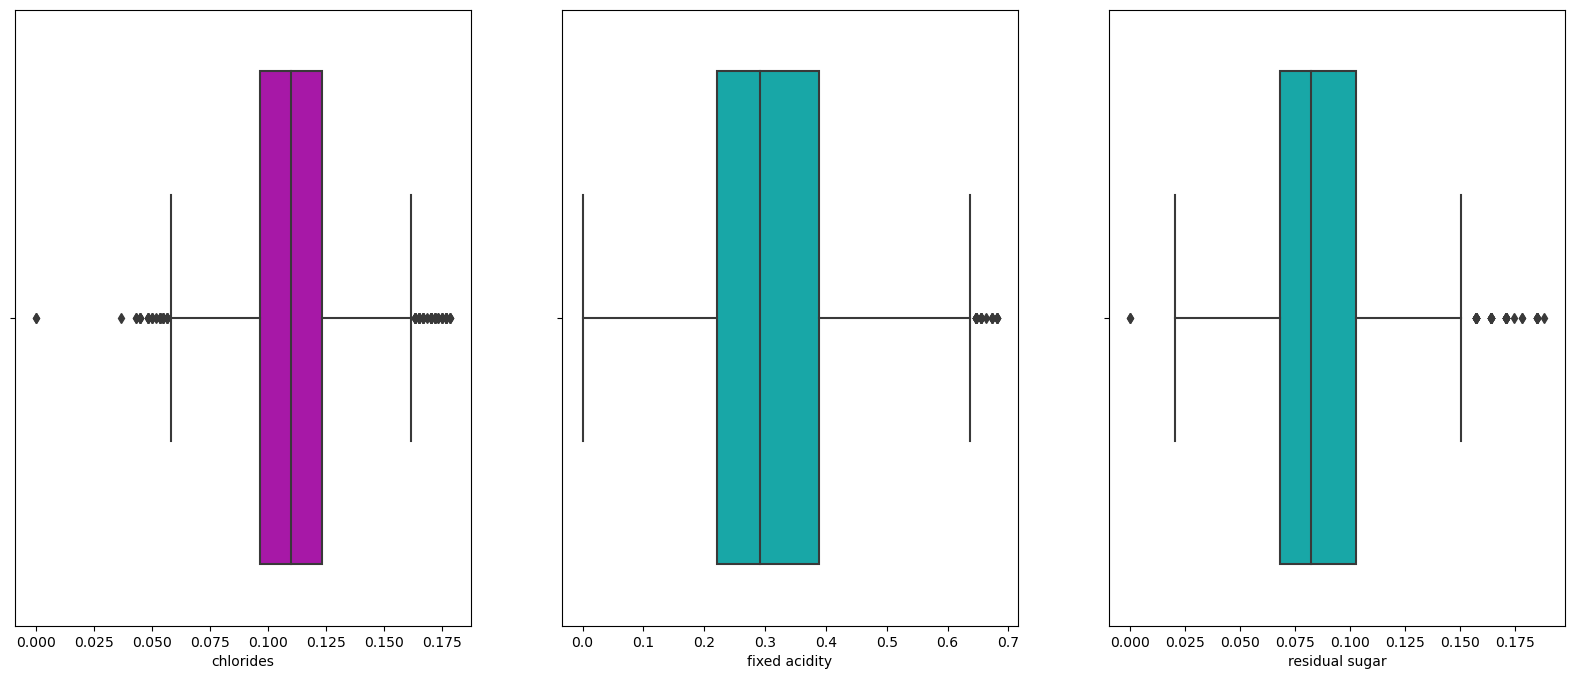

In [112]:
fig , ax = plt.subplots(1,3,figsize=(20,8))
sns.boxplot(scaled_wine['chlorides'] , ax = ax[0] , color = 'm')
sns.boxplot(scaled_wine['fixed acidity'] , ax= ax[1] , color ='c')
sns.boxplot(scaled_wine['residual sugar'] , ax= ax[2] , color ='c')
plt.show()

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


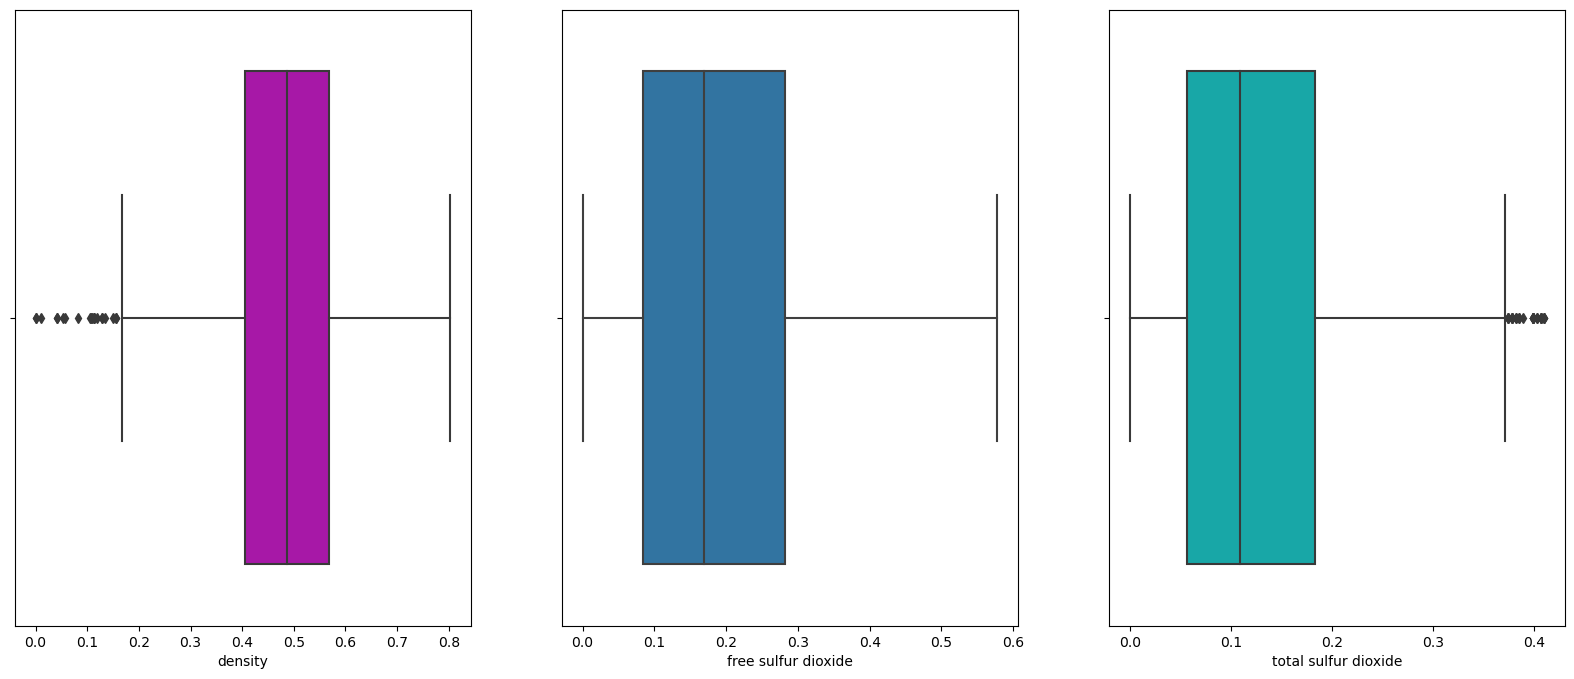

In [113]:
fig , ax = plt.subplots(1,3,figsize=(20,8))
sns.boxplot(scaled_wine['density'] , ax = ax[0] , color = 'm')
sns.boxplot(scaled_wine['free sulfur dioxide'] , ax= ax[1])
sns.boxplot(scaled_wine['total sulfur dioxide'] , ax= ax[2] , color ='c')
plt.show()

In [114]:
# INFERENCES FROM BOXPLOTS

# It is evident from the boxplots that the dataset has too many outliers. 
# To remove these outliers , the approach that I will be taking is to calculate the the 25% and 75% percentile and interquantile range to measure the minimum and maximum values and replace the values that are above or below the upper and lower whisker with the median values of that feature
# Any value that falls beyond the upper whisker and below the lower whisker is considered an outlier
# Verify whether the outliers have been reduced after employing this technique by using boxplots

In [115]:
q3,q1 = np.percentile(scaled_wine['alcohol'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max



(0.41538461538461546,
 0.1692307692307693,
 0.24615384615384617,
 -0.19999999999999996,
 0.7846153846153847)

In [116]:
alcohol = np.where(scaled_wine['alcohol'] > 0.7846153846153847)
alcohol = np.array(alcohol)
alcohol = alcohol.tolist()
alcohol

[[142, 144, 467, 588, 652, 821, 1114, 1132, 1228, 1269, 1270, 1475, 1477]]

In [117]:
al_out = []
for index in alcohol:
    for number in index:
        al_out.append(number)

In [118]:
percent = pd.DataFrame()
percentage = []
for i in al_out:
    al_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(al_p)
    alch_perc = pd.concat(percentage)


In [119]:
alch_perc

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,good quality
142,0.053097,0.00,0.061644,0.063439,0.366197,0.201413,0.112335,0.275449,0.861538,0.6,0
144,0.053097,0.00,0.061644,0.063439,0.366197,0.201413,0.112335,0.275449,0.861538,0.6,0
467,0.371681,0.45,0.116438,0.088481,0.084507,0.042403,0.339941,0.275449,0.861538,0.6,0
588,0.035398,0.24,0.075342,0.080134,0.253521,0.155477,0.119677,0.245509,0.861538,1.0,1
652,0.292035,0.65,0.082192,0.140234,0.295775,0.229682,0.552863,0.305389,1.000000,0.4,0
821,0.026549,0.00,0.082192,0.060100,0.211268,0.127208,0.107930,0.245509,0.861538,0.8,1
1114,0.035398,0.50,0.082192,0.056761,0.394366,0.261484,0.009545,0.197605,0.800000,0.6,0
1132,0.247788,0.34,0.061644,0.105175,0.239437,0.113074,0.237151,0.329341,0.800000,0.8,1
1228,0.044248,0.00,0.061644,0.053422,0.239437,0.289753,0.110132,0.239521,0.800000,0.8,1
1269,0.079646,0.03,0.061644,0.053422,0.380282,0.286219,0.053598,0.293413,0.861538,1.0,1


In [120]:
modified_alcohol = scaled_wine.loc[scaled_wine['alcohol'] < 0.7846153846153847 , 'alcohol'].median()
scaled_wine.loc[scaled_wine['alcohol'] > 0.7846153846153847 , 'alcohol'] = np.nan
scaled_wine.fillna(modified_alcohol,inplace = True)

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol'>

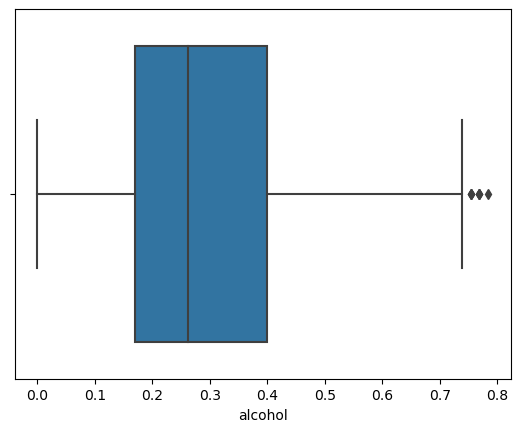

In [121]:
sns.boxplot(scaled_wine['alcohol'])

In [122]:
q3,q1 = np.percentile(scaled_wine['alcohol'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max


(0.40000000000000013,
 0.1692307692307693,
 0.23076923076923084,
 -0.17692307692307696,
 0.7461538461538464)

In [123]:
fx = np.where(scaled_wine['alcohol'] > 0.7461538461538464)
fx = np.array(fx)
fx = fx.tolist()
fx

[[378, 455, 484, 491, 492, 1118, 1126]]

In [124]:
q3,q1 = np.percentile(scaled_wine['citric acid'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.42, 0.09, 0.32999999999999996, -0.4049999999999999, 0.9149999999999999)

In [125]:
cit_acid = np.where(scaled_wine['citric acid'] > 0.9149999999999999)
cit_acid = np.array(cit_acid)
cit_acid = cit_acid.tolist()
cit_acid

[[]]

In [126]:
cit_out = []
for index in cit_acid:
    for number in index:
        cit_out.append(number)

In [127]:
percentage = []
for i in cit_out:
    cit_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(cit_p)
    cit_perc = pd.concat(percentage)


In [128]:
cit_perc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,0.40708,0.273973,1.0,0.171233,0.998331,0.43662,0.222615,0.699706,0.0,1.0,0.153846,0.2


In [129]:
modified_cit = scaled_wine.loc[scaled_wine['citric acid'] < 0.9149999999999999 , 'citric acid'].median()
scaled_wine.loc[scaled_wine['citric acid'] > 0.9149999999999999 , 'citric acid'] = np.nan
scaled_wine.fillna(modified_cit,inplace = True)

In [130]:
scaled_wine.iloc[151:152,:]

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,good quality
151,0.40708,0.26,0.171233,0.110184,0.43662,0.222615,0.699706,0.173653,0.153846,0.2,0


In [131]:
q3,q1 = np.percentile(scaled_wine['citric acid'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.42, 0.09, 0.32999999999999996, -0.4049999999999999, 0.9149999999999999)

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='citric acid'>

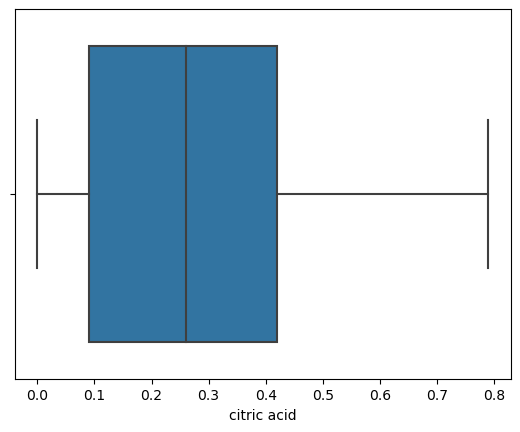

In [132]:
sns.boxplot(scaled_wine['citric acid'])

In [133]:
q3,q1 = np.percentile(scaled_wine['citric acid'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.42, 0.09, 0.32999999999999996, -0.4049999999999999, 0.9149999999999999)

In [134]:
fx = np.where(scaled_wine['citric acid'] >0.9149999999999999 )
fx = np.array(fx)
fx = fx.tolist()
fx

[[]]

In [135]:
q3,q1 = np.percentile(scaled_wine['sulphates'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.2275449101796407,
 0.1317365269461078,
 0.09580838323353291,
 -0.011976047904191572,
 0.37125748502994005)

In [136]:
sulphate = np.where(scaled_wine['sulphates'] > 0.4011976047904191)
sulphate = np.array(sulphate)
sulphate = sulphate.tolist()
sulphate

[[]]

In [137]:
sul_out = []
for index in sulphate:
    for number in index:
        sul_out.append(number)

In [138]:
percentage = []
for i in sul_out:
    sul_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(sul_p)
    sul_perc = pd.concat(percentage)


In [139]:
sul_perc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,0.283186,0.335616,0.29,0.047945,0.170284,0.112676,0.081272,0.538179,0.448276,0.736527,0.107692,0.4
17,0.309735,0.301370,0.28,0.054795,0.594324,0.211268,0.176678,0.494126,0.318966,0.568862,0.138462,0.4
19,0.292035,0.136986,0.51,0.061644,0.549249,0.225352,0.176678,0.501468,0.258621,0.449102,0.123077,0.6
43,0.309735,0.369863,0.22,0.089041,0.095159,0.112676,0.060071,0.494126,0.482759,0.520958,0.292308,0.4
79,0.327434,0.345890,0.20,0.041096,0.113523,0.366197,0.399293,0.523495,0.362069,0.473054,0.107692,0.2
81,0.283186,0.212329,0.70,0.068493,0.754591,0.295775,0.215548,0.538179,0.336207,0.568862,0.153846,0.4
83,0.238938,0.376712,0.26,0.061644,0.649416,0.211268,0.159011,0.501468,0.362069,0.485030,0.153846,0.4
86,0.353982,0.253425,0.28,0.068493,0.163606,0.267606,0.459364,0.523495,0.163793,0.970060,0.230769,0.6
88,0.415929,0.184932,0.44,0.082192,0.158598,0.464789,0.420495,0.567548,0.344828,0.532934,0.169231,0.4
91,0.353982,0.253425,0.28,0.068493,0.163606,0.267606,0.459364,0.523495,0.163793,0.970060,0.230769,0.6


In [140]:
modified_sul = scaled_wine.loc[scaled_wine['sulphates'] < 0.4011976047904191 , 'sulphates'].median()
scaled_wine.loc[scaled_wine['sulphates'] > 0.4011976047904191 , 'sulphates'] = np.nan
scaled_wine.fillna(modified_sul,inplace = True)

In [141]:
q3,q1 = np.percentile(scaled_wine['sulphates'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.2275449101796407,
 0.1317365269461078,
 0.09580838323353291,
 -0.011976047904191572,
 0.37125748502994005)

In [142]:
sulphate = np.where(scaled_wine['sulphates'] > 0.37125748502994005 )
sulphate = np.array(sulphate)
sulphate = sulphate.tolist()
sulphate

[[69,
  197,
  245,
  249,
  269,
  271,
  277,
  289,
  350,
  378,
  522,
  623,
  946,
  1166,
  1516,
  1522]]

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sulphates'>

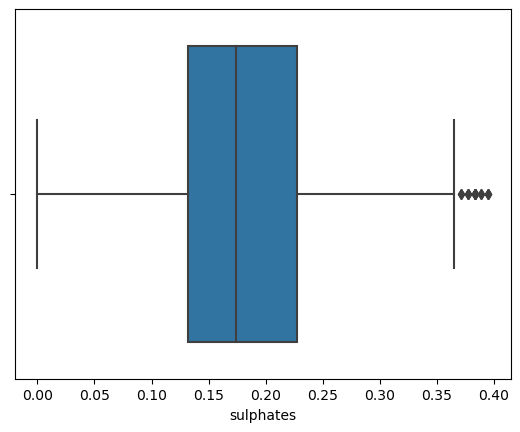

In [143]:
sns.boxplot(scaled_wine['sulphates'] )

In [144]:
q3,q1 = np.percentile(scaled_wine['free sulfur dioxide'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.28169014084507044,
 0.08450704225352114,
 0.1971830985915493,
 -0.21126760563380287,
 0.5774647887323945)

In [145]:
s = np.where(scaled_wine['free sulfur dioxide'] > 0.5774647887323945)
s = np.array(s)
s = s.tolist()
s

[[]]

In [146]:
s_out = []
for index in s:
    for number in index:
        s_out.append(number)

In [147]:
percentage = []
for i in s_out:
    s_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(s_p)
    s_perc = pd.concat(percentage)


In [148]:
s_perc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,0.380531,0.342466,0.18,0.198630,0.273790,0.718310,0.491166,0.626285,0.362069,0.329341,0.123077,0.4
15,0.380531,0.342466,0.19,0.205479,0.263773,0.704225,0.501767,0.626285,0.370690,0.359281,0.123077,0.4
57,0.256637,0.349315,0.12,0.287671,0.165275,0.690141,0.367491,0.604258,0.448276,0.263473,0.153846,0.4
396,0.176991,0.421233,0.02,0.479452,0.183639,0.943662,0.416961,0.685022,0.672414,0.119760,0.230769,0.4
400,0.176991,0.421233,0.02,0.479452,0.183639,0.943662,0.416961,0.685022,0.672414,0.119760,0.230769,0.4
497,0.230088,0.150685,0.32,0.109589,0.130217,0.591549,0.378092,0.479442,0.672414,0.275449,0.415385,0.4
522,0.318584,0.184932,0.49,0.095890,0.145242,0.647887,0.448763,0.574890,0.672414,0.395210,0.215385,0.4
584,0.637168,0.143836,0.49,0.171233,0.135225,0.746479,0.261484,0.743759,0.672414,0.257485,0.353846,0.8
634,0.292035,0.157534,0.21,0.068493,0.101836,0.633803,0.339223,0.464758,0.672414,0.149701,0.169231,0.4
678,0.327434,0.452055,0.10,0.116438,0.115192,0.619718,0.286219,0.604258,0.672414,0.119760,0.246154,0.4


In [149]:
modified_SO2 = scaled_wine.loc[scaled_wine['free sulfur dioxide'] < 0.5774647887323945 , 'free sulfur dioxide'].median()
scaled_wine.loc[scaled_wine['free sulfur dioxide'] > 0.5774647887323945 , 'free sulfur dioxide'] = np.nan
scaled_wine.fillna(modified_SO2,inplace = True)

In [150]:
q3,q1 = np.percentile(scaled_wine['free sulfur dioxide'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.28169014084507044,
 0.08450704225352114,
 0.1971830985915493,
 -0.21126760563380287,
 0.5774647887323945)

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='free sulfur dioxide'>

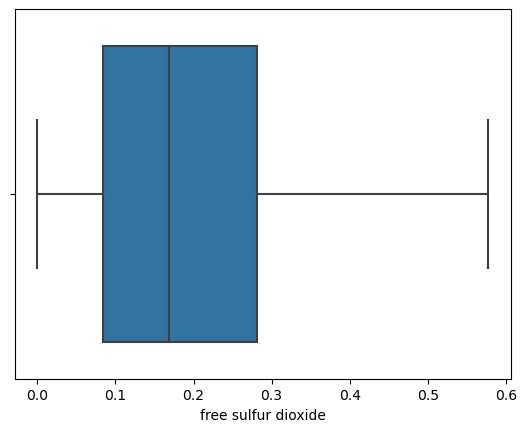

In [151]:
sns.boxplot(scaled_wine['free sulfur dioxide'] )

In [152]:
s = np.where(scaled_wine['free sulfur dioxide'] > 0.5774647887323945)
s = np.array(s)
s = s.tolist()
s

[[]]

In [153]:

q3,q1 = np.percentile(scaled_wine['density'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.567547723935391,
 0.40602055800295034,
 0.16152716593244065,
 0.16372980910428936,
 0.809838472834052)

In [154]:
den = np.where(scaled_wine['density'] > 0.8162628487518226)
den = np.array(den)
den = den.tolist()
den

[[]]

In [155]:
den_out = []
for index in den:
    for number in index:
        den_out.append(number)

In [156]:
percentage = []
for i in den_out:
    den_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(den_p)
    den_perc = pd.concat(percentage)

In [157]:
den_perc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,0.769912,0.150685,0.52,0.157534,0.136895,0.225352,0.166078,0.831865,0.672414,0.287425,0.169231,0.6
324,0.477876,0.253425,0.20,0.691781,0.098497,0.169014,0.155477,0.839207,0.672414,0.215569,0.123077,0.6
325,0.477876,0.253425,0.20,0.691781,0.098497,0.169014,0.155477,0.839207,0.672414,0.215569,0.123077,0.6
353,0.787611,0.280822,0.79,0.267123,0.180301,0.309859,0.250883,0.861233,0.672414,0.263473,0.707692,0.4
364,0.725664,0.339041,0.66,0.335616,0.118531,0.084507,0.127208,0.890602,0.672414,0.239521,0.246154,0.8
366,0.725664,0.339041,0.66,0.335616,0.118531,0.084507,0.127208,0.890602,0.672414,0.239521,0.246154,0.8
374,0.831858,0.198630,0.63,0.198630,0.128548,0.070423,0.144876,0.831865,0.672414,0.287425,0.369231,0.6
381,0.805310,0.202055,0.68,0.136986,0.121870,0.225352,0.130742,0.831865,0.672414,0.281437,0.246154,0.6
391,0.805310,0.202055,0.68,0.136986,0.121870,0.225352,0.130742,0.831865,0.672414,0.281437,0.246154,0.6
415,0.353982,0.414384,0.24,0.390411,0.175292,0.422535,0.452297,0.831865,0.672414,0.173653,0.138462,0.4


In [158]:
modified_den = scaled_wine.loc[scaled_wine['density'] < 0.8162628487518226 , 'density'].median()
scaled_wine.loc[scaled_wine['density'] > 0.8162628487518226 , 'density'] = np.nan
scaled_wine.fillna(modified_den,inplace = True)

In [159]:
q3,q1 = np.percentile(scaled_wine['density'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.567547723935391,
 0.40602055800295034,
 0.16152716593244065,
 0.16372980910428936,
 0.809838472834052)

In [160]:
den = np.where(scaled_wine['density'] > 0.809838472834052)
den = np.array(den)
den = den.tolist()
den

[[]]

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='density'>

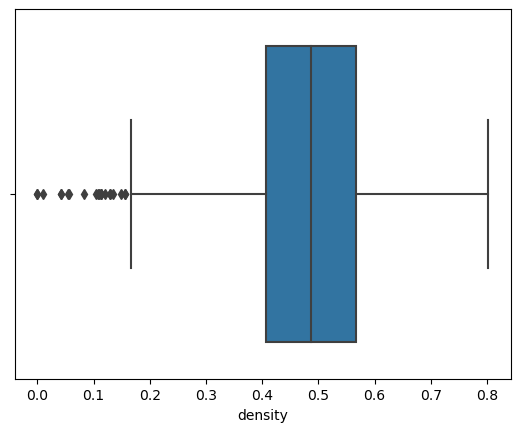

In [161]:
sns.boxplot(scaled_wine['density'])

In [162]:
q3,q1 = np.percentile(scaled_wine['total sulfur dioxide'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.18374558303886923,
 0.05653710247349823,
 0.12720848056537098,
 -0.13427561837455826,
 0.3745583038869257)

In [163]:
tso = np.where(scaled_wine['total sulfur dioxide'] > 0.4098939929328622)
tso = np.array(tso)
tso = tso.tolist()
tso

[[]]

In [164]:
ts_out = []
for index in tso:
    for number in index:
        ts_out.append(number)

In [165]:
percentage = []
for i in ts_out:
    ts_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(ts_p)
    ts_perc = pd.concat(percentage)

In [166]:
ts_perc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,0.380531,0.342466,0.18,0.198630,0.273790,0.169014,0.491166,0.626285,0.362069,0.329341,0.123077,0.4
15,0.380531,0.342466,0.19,0.205479,0.263773,0.169014,0.501767,0.626285,0.370690,0.359281,0.123077,0.4
86,0.353982,0.253425,0.28,0.068493,0.163606,0.267606,0.459364,0.523495,0.163793,0.173653,0.230769,0.6
88,0.415929,0.184932,0.44,0.082192,0.158598,0.464789,0.420495,0.567548,0.344828,0.173653,0.169231,0.4
90,0.292035,0.273973,0.26,0.068493,0.111853,0.577465,0.473498,0.464758,0.422414,0.125749,0.169231,0.4
91,0.353982,0.253425,0.28,0.068493,0.163606,0.267606,0.459364,0.523495,0.163793,0.173653,0.230769,0.6
92,0.353982,0.253425,0.29,0.075342,0.163606,0.253521,0.448763,0.523495,0.163793,0.173653,0.215385,0.4
109,0.309735,0.455479,0.52,0.075342,0.183639,0.507042,0.519435,0.501468,0.405172,0.215569,0.138462,0.4
130,0.300885,0.428082,0.56,0.075342,0.176962,0.408451,0.452297,0.494126,0.431034,0.197605,0.153846,0.4
145,0.309735,0.376712,0.55,0.061644,0.175292,0.436620,0.477032,0.494126,0.370690,0.173653,0.153846,0.4


In [167]:
modified_tSO2 = scaled_wine.loc[scaled_wine['total sulfur dioxide'] < 0.4098939929328622 , 'total sulfur dioxide'].median()
scaled_wine.loc[scaled_wine['total sulfur dioxide'] > 0.4098939929328622 , 'total sulfur dioxide'] = np.nan
scaled_wine.fillna(modified_tSO2,inplace = True)

In [168]:
q3,q1 = np.percentile(scaled_wine['total sulfur dioxide'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.18374558303886923,
 0.05653710247349823,
 0.12720848056537098,
 -0.13427561837455826,
 0.3745583038869257)

In [169]:
ts = np.where(scaled_wine['total sulfur dioxide'] > 0.3745583038869257)
ts = np.array(ts)
ts = ts.tolist()
ts

[[32,
  46,
  53,
  61,
  79,
  163,
  164,
  195,
  207,
  215,
  255,
  332,
  414,
  497,
  524,
  561,
  620,
  693,
  711,
  789,
  852,
  905,
  967,
  977,
  1184,
  1188,
  1235,
  1558]]

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

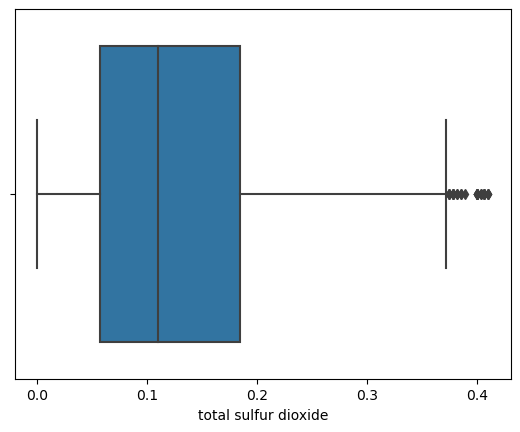

In [170]:
sns.boxplot(scaled_wine['total sulfur dioxide'] )

In [171]:
q3,q1 = np.percentile(scaled_wine['chlorides'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.12353923205342235,
 0.09682804674457429,
 0.026711185308848057,
 0.05676126878130221,
 0.16360601001669445)

In [172]:
cl = np.where(scaled_wine['chlorides'] > 0.1803005008347245 )
cl = np.array(cl)
cl = cl.tolist()
cl

[[]]

In [173]:
cl_out = []
for index in cl:
    for number in index:
        cl_out.append(number)

In [174]:
percentage = []
for i in cl_out:
    cl_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(cl_p)
    cl_perc = pd.concat(percentage)

In [175]:
cl_perc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,0.380531,0.342466,0.18,0.198630,0.273790,0.169014,0.109541,0.626285,0.362069,0.329341,0.123077,0.4
15,0.380531,0.342466,0.19,0.205479,0.263773,0.169014,0.109541,0.626285,0.370690,0.359281,0.123077,0.4
17,0.309735,0.301370,0.28,0.054795,0.594324,0.211268,0.176678,0.494126,0.318966,0.173653,0.138462,0.4
19,0.292035,0.136986,0.51,0.061644,0.549249,0.225352,0.176678,0.501468,0.258621,0.173653,0.123077,0.6
38,0.097345,0.691781,0.09,0.041096,0.267112,0.084507,0.045936,0.288546,0.655172,0.089820,0.215385,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,0.477876,0.178082,0.38,0.047945,0.262104,0.366197,0.296820,0.665932,0.672414,0.191617,0.015385,0.4
1474,0.469027,0.260274,0.50,0.883562,0.322204,0.169014,0.268551,0.486784,0.672414,0.251497,0.061538,0.4
1476,0.469027,0.260274,0.50,0.883562,0.322204,0.169014,0.268551,0.486784,0.672414,0.251497,0.061538,0.4
1558,0.203540,0.349315,0.33,0.397260,0.372287,0.169014,0.385159,0.572687,0.672414,0.137725,0.169231,0.4


In [176]:
modified_cl = scaled_wine.loc[scaled_wine['chlorides'] < 0.1803005008347245 , 'chlorides'].median()
scaled_wine.loc[scaled_wine['chlorides'] > 0.1803005008347245 , 'chlorides'] = np.nan
scaled_wine.fillna(modified_cl,inplace = True)

In [177]:
q3,q1 = np.percentile(scaled_wine['chlorides'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.12353923205342235,
 0.09682804674457429,
 0.026711185308848057,
 0.05676126878130221,
 0.16360601001669445)

In [178]:
cl = np.where(scaled_wine['chlorides'] > 0.16360601001669445)
cl = np.array(cl)
cl = cl.tolist()
cl

[[13,
  46,
  47,
  54,
  57,
  61,
  86,
  91,
  92,
  118,
  121,
  130,
  145,
  185,
  304,
  342,
  343,
  357,
  393,
  415,
  416,
  484,
  556,
  558,
  608,
  629,
  645,
  735,
  736,
  781,
  783,
  803,
  841,
  842,
  889,
  911,
  956,
  962,
  1008,
  1009,
  1094,
  1096,
  1152,
  1155,
  1159,
  1166,
  1194,
  1203,
  1277,
  1360,
  1365,
  1373,
  1482,
  1518,
  1578]]

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chlorides'>

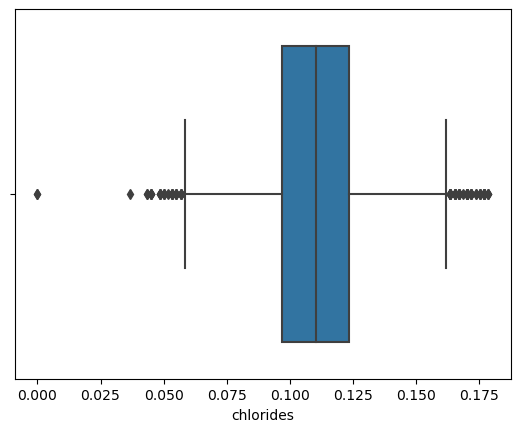

In [179]:
sns.boxplot(scaled_wine['chlorides'] )

In [180]:
q3,q1 = np.percentile(scaled_wine['fixed acidity'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.3893805309734514,
 0.22123893805309736,
 0.16814159292035402,
 -0.030973451327433676,
 0.6415929203539824)

In [181]:
fa = np.where(scaled_wine['fixed acidity'] > 0.6858407079646016 )
fa = np.array(fa)
fa = fa.tolist()
fa

[[]]

In [182]:
fa_out = []
for index in fa:
    for number in index:
        fa_out.append(number)

In [183]:
percentage = []
for i in fa_out:
    fa_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(fa_p)
    fa_perc = pd.concat(percentage)

In [184]:
fa_perc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,0.725664,0.123288,0.74,0.116438,0.138564,0.112676,0.077739,0.685022,0.672414,0.263473,0.369231,0.8
206,0.725664,0.123288,0.74,0.116438,0.138564,0.112676,0.077739,0.685022,0.672414,0.263473,0.369231,0.8
243,0.920354,0.061644,0.44,0.089041,0.105175,0.126761,0.063604,0.732746,0.672414,0.305389,0.123077,0.8
244,0.920354,0.061644,0.44,0.089041,0.105175,0.126761,0.063604,0.732746,0.672414,0.305389,0.123077,0.8
264,0.699115,0.301370,0.49,0.102740,0.086811,0.056338,0.074205,0.721733,0.672414,0.323353,0.384615,0.4
294,0.769912,0.150685,0.52,0.157534,0.136895,0.225352,0.166078,0.486784,0.672414,0.287425,0.169231,0.6
328,0.778761,0.102740,0.62,0.116438,0.116861,0.070423,0.053004,0.743759,0.672414,0.203593,0.200000,0.6
338,0.690265,0.253425,0.58,0.143836,0.151920,0.380282,0.328622,0.787812,0.672414,0.173653,0.476923,0.6
339,0.699115,0.109589,0.54,0.095890,0.116861,0.154930,0.081272,0.707048,0.672414,0.173653,0.215385,0.8
347,0.814159,0.253425,0.67,0.143836,0.135225,0.070423,0.031802,0.626285,0.672414,0.359281,0.553846,0.6


In [185]:
modified_fa = scaled_wine.loc[scaled_wine['fixed acidity'] < 0.6858407079646016 , 'fixed acidity'].median()
scaled_wine.loc[scaled_wine['fixed acidity'] > 0.6858407079646016 , 'fixed acidity'] = np.nan
scaled_wine.fillna(modified_fa,inplace = True)

In [186]:
q3,q1 = np.percentile(scaled_wine['fixed acidity'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.3893805309734514,
 0.22123893805309736,
 0.16814159292035402,
 -0.030973451327433676,
 0.6415929203539824)

In [187]:
fa = np.where(scaled_wine['fixed acidity'] > 0.6415929203539824)
fa = np.array(fa)
fa = fa.tolist()
fa

[[241,
  286,
  335,
  340,
  344,
  358,
  362,
  395,
  402,
  407,
  418,
  432,
  433,
  435,
  441,
  449,
  450,
  531,
  532,
  575,
  580,
  581,
  583,
  597,
  657,
  664,
  937,
  979,
  984]]

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixed acidity'>

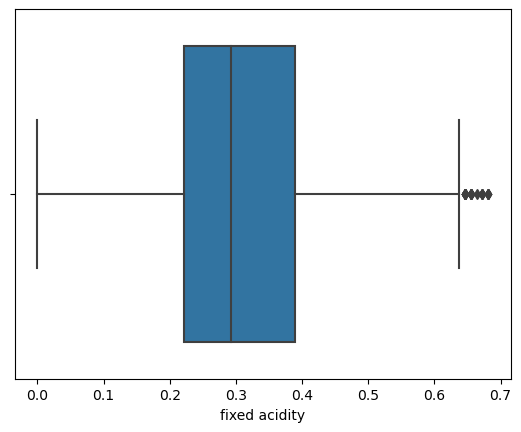

In [188]:
sns.boxplot(scaled_wine['fixed acidity'] )

In [189]:
q3,q1 = np.percentile(scaled_wine['residual sugar'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.10273972602739725,
 0.0684931506849315,
 0.03424657534246575,
 0.017123287671232876,
 0.1541095890410959)

In [190]:
rs = np.where(scaled_wine['residual sugar'] > 0.18835616438356162 )
rs = np.array(rs)
rs = rs.tolist()
rs

[[]]

In [191]:
rs_out = []
for index in rs:
    for number in index:
        rs_out.append(number)

In [192]:
percentage = []
for i in rs_out:
    rs_p = scaled_wine.iloc[i:i+1,:]
    percentage.append(rs_p)
    rs_perc = pd.concat(percentage)

In [193]:
rs_perc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.134276,0.567548,0.525862,0.281437,0.323077,0.4
11,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.525862,0.281437,0.323077,0.4
14,0.380531,0.342466,0.18,0.198630,0.110184,0.169014,0.109541,0.626285,0.362069,0.329341,0.123077,0.4
15,0.380531,0.342466,0.19,0.205479,0.110184,0.169014,0.109541,0.626285,0.370690,0.359281,0.123077,0.4
18,0.247788,0.321918,0.08,0.239726,0.123539,0.070423,0.081272,0.538179,0.551724,0.101796,0.092308,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,0.150442,0.383562,0.01,0.191781,0.151920,0.436620,0.169611,0.425110,0.672414,0.197605,0.446154,0.6
1558,0.203540,0.349315,0.33,0.397260,0.110184,0.169014,0.385159,0.572687,0.672414,0.137725,0.169231,0.4
1574,0.088496,0.130137,0.78,0.890411,0.103506,0.309859,0.303887,0.491924,0.672414,0.089820,0.323077,0.6
1577,0.141593,0.397260,0.15,0.287671,0.106845,0.169014,0.074205,0.451542,0.672414,0.161677,0.538462,0.6


In [194]:
modified_rs = scaled_wine.loc[scaled_wine['residual sugar'] < 0.18835616438356162 , 'residual sugar'].median()
scaled_wine.loc[scaled_wine['residual sugar'] > 0.18835616438356162 , 'residual sugar'] = np.nan
scaled_wine.fillna(modified_rs,inplace = True)

In [195]:
q3,q1 = np.percentile(scaled_wine['residual sugar'] , [75,25])
iqr = q3-q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
q3,q1,iqr,min,max

(0.10273972602739725,
 0.0684931506849315,
 0.03424657534246575,
 0.017123287671232876,
 0.1541095890410959)

In [196]:
rs = np.where(scaled_wine['residual sugar'] >0.1541095890410959 )
rs = np.array(rs)
rs = rs.tolist()
rs

[[56,
  151,
  255,
  266,
  267,
  280,
  281,
  284,
  285,
  289,
  294,
  316,
  318,
  320,
  321,
  326,
  332,
  335,
  365,
  434,
  437,
  438,
  540,
  570,
  574,
  584,
  593,
  607,
  609,
  620,
  621,
  633,
  646,
  679,
  698,
  712,
  729,
  731,
  778,
  798,
  799,
  801,
  816,
  819,
  899,
  929,
  978,
  1008,
  1044,
  1108,
  1129,
  1385,
  1598]]

C:\Users\Fouzia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

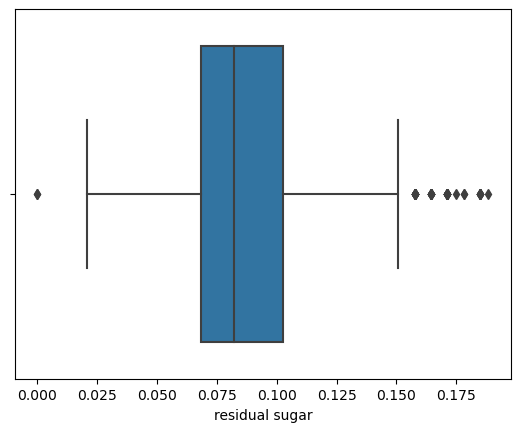

In [197]:
sns.boxplot(scaled_wine['residual sugar'] )

In [198]:
scaled_wine.describe()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,good quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.314561,0.270513,0.087131,0.110927,0.199227,0.129876,0.484060,0.183120,0.306459,0.527205,0.135710
std,0.131937,0.193945,0.029278,0.024666,0.128794,0.094430,0.128984,0.071108,0.156553,0.161514,0.342587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.131737,0.169231,0.400000,0.000000
50%,0.292035,0.260000,0.082192,0.110184,0.169014,0.109541,0.486784,0.173653,0.261538,0.600000,0.000000
75%,0.389381,0.420000,0.102740,0.123539,0.281690,0.183746,0.567548,0.227545,0.400000,0.600000,0.000000
max,0.681416,0.790000,0.188356,0.178631,0.577465,0.409894,0.802496,0.395210,0.784615,1.000000,1.000000


In [199]:
scaled_wine

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,good quality
0,0.247788,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.137725,0.153846,0.4,0
1,0.283186,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.209581,0.215385,0.4,0
2,0.283186,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.191617,0.215385,0.4,0
3,0.584071,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.149701,0.215385,0.6,0
4,0.247788,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.137725,0.153846,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.149701,0.323077,0.4,0
1595,0.115044,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.257485,0.430769,0.6,0
1596,0.150442,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.251497,0.400000,0.6,0
1597,0.115044,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.227545,0.276923,0.4,0


In [200]:
scaled_wine['good quality'] = [1 if x >= 0.7 else 0 for x in scaled_wine['quality']]
scaled_wine['good quality'].value_counts()

0    1382
1     217
Name: good quality, dtype: int64

In [201]:
scaled_wine

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,good quality
0,0.247788,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.137725,0.153846,0.4,0
1,0.283186,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.209581,0.215385,0.4,0
2,0.283186,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.191617,0.215385,0.4,0
3,0.584071,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.149701,0.215385,0.6,0
4,0.247788,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.137725,0.153846,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.149701,0.323077,0.4,0
1595,0.115044,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.257485,0.430769,0.6,0
1596,0.150442,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.251497,0.400000,0.6,0
1597,0.115044,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.227545,0.276923,0.4,0


In [202]:
X = scaled_wine.drop(['quality','good quality'], axis=1)
y = scaled_wine['good quality']

In [203]:
X = np.asarray(X).reshape(-1,9)
y = np.asarray(y).reshape(-1,1)

In [204]:
X.shape , y.shape

((1599, 9), (1599, 1))

In [205]:
X_train , X_test , y_train , y_test = train_test_split(X , y , stratify = y , test_size = 0.2 , random_state = 1)

In [206]:
X_train

array([[0.2920354 , 0.49      , 0.08219178, ..., 0.48678414, 0.24550898,
        0.41538462],
       [0.24778761, 0.05      , 0.06849315, ..., 0.44273128, 0.14371257,
        0.47692308],
       [0.37168142, 0.41      , 0.08219178, ..., 0.47797357, 0.17365269,
        0.56923077],
       ...,
       [0.19469027, 0.        , 0.12328767, ..., 0.38986784, 0.17964072,
        0.44615385],
       [0.38938053, 0.25      , 0.13013699, ..., 0.56681351, 0.14371257,
        0.2       ],
       [0.17699115, 0.03      , 0.09589041, ..., 0.37665198, 0.13772455,
        0.6       ]])

In [207]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [208]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1279, 9), (320, 9), (1279, 1), (320, 1))

In [209]:
model_classifier = RandomForestClassifier()

In [210]:
parameters = {
               "max_depth": [5,10,15],
              "max_features": [1, 5, 10 ],
              "min_samples_split": [1, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "criterion": ["gini", "entropy"]}


In [211]:
random_classifier = GridSearchCV(estimator = model_classifier, param_grid = parameters , cv=5 , scoring ='accuracy')

In [212]:
random_classifier.fit(X_train,y_train)

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [1, 5, 10]},
             scoring='accuracy')

In [213]:
random_classifier.cv_results_

{'mean_fit_time': array([0.0469718 , 0.16664352, 0.18208737, 0.04617124, 0.17169323,
        0.17888885, 0.04457231, 0.1662962 , 0.19208083, 0.0447721 ,
        0.22765965, 0.23025985, 0.04597058, 0.23625059, 0.22245903,
        0.04637032, 0.22685542, 0.21026778, 0.04637079, 0.04657025,
        0.04257298, 0.0491694 , 0.04517121, 0.04737053, 0.0459712 ,
        0.04597058, 0.044172  , 0.04836903, 0.19128075, 0.19687729,
        0.04637012, 0.18168654, 0.18188758, 0.04876981, 0.22506065,
        0.1988759 , 0.04677052, 0.28282361, 0.26983209, 0.04657054,
        0.26843224, 0.26943283, 0.04797015, 0.26263628, 0.26303663,
        0.05016861, 0.04816933, 0.059163  , 0.05316653, 0.04896894,
        0.05096827, 0.0503684 , 0.05276823, 0.05496631, 0.05196757,
        0.21006842, 0.18828235, 0.05416622, 0.19447889, 0.23705153,
        0.05916324, 0.20427346, 0.19667649, 0.0537663 , 0.32579746,
        0.31940117, 0.05396528, 0.30661025, 0.30820727, 0.05536518,
        0.29361715, 0.28782115,

In [214]:
best_parameters = random_classifier.best_params_

In [215]:
best_parameters

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [216]:
accuracy_rfc = random_classifier.best_score_
print(f'Accuracy of the training set while tuning : {accuracy_rfc*100}')

Accuracy of the training set while tuning : 89.9920343137255


In [217]:
model_rfc = RandomForestClassifier(criterion = 'gini',
 max_depth = 15,
 max_features = 5,
 min_samples_leaf = 1,
 min_samples_split = 5)

In [218]:
model_rfc.fit(X_train , y_train)

C:\Users\Fouzia\AppData\Local\Temp\ipykernel_5820\2613515347.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(X_train , y_train)


RandomForestClassifier(max_depth=15, max_features=5, min_samples_split=5)

In [219]:

y_pred = model_rfc.predict(X_test)


In [220]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [221]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [222]:
acc_rfc = accuracy_score(y_test , y_pred)
print(f'Accuracy of the testing set while tuning : {acc_rfc*100}')

Accuracy of the testing set while tuning : 93.4375


In [223]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.81      0.67      0.73        43

    accuracy                           0.93       320
   macro avg       0.88      0.82      0.85       320
weighted avg       0.93      0.93      0.93       320



In [224]:
model_rfc.classes_

array([0, 1], dtype=int64)

In [ ]:
# Confusion matrix is a metric that gives an insight into the classes of prediction.
# Class 0 - Bad quality wines , Class 1 - good quality wines
# For a Random Forest Classifier , the model has predicted 270 samples as true negatives (bad quality wines were predicted as bad quality) and 7 samples as false positives (bad quality wines were predicted as good quality wines)
# The model has also predicted 14 samples as false negatives (good quality wines were predicted as bad quality wines) and 29 samples were predicted as true positives (good quality wines were predicted as good quality)

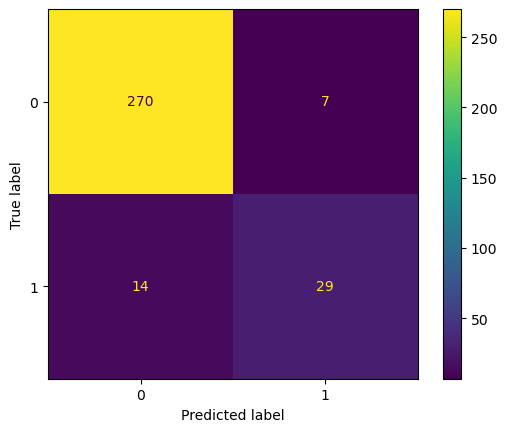

In [225]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [226]:

knn = KNeighborsClassifier()


In [227]:
import math
math.sqrt(len(y_test))

17.88854381999832

In [228]:
knn_parameters = {
                    "n_neighbors" : range(1 , 20 , 2),
                    "weights" : ["uniform" , "distance"],
                    "metric" : ["euclidean" ,  "minkowski"],
    
}

In [229]:
knn_classifier = GridSearchCV(knn , param_grid = knn_parameters , cv =5 , scoring = "accuracy" )

In [230]:
knn_classifier.fit(X_train , y_train)

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `m

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': range(1, 20, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [231]:
knn_classifier.cv_results_

{'mean_fit_time': array([0.00499573, 0.00259748, 0.00259762, 0.00259819, 0.00259838,
        0.0023984 , 0.00279632, 0.00259862, 0.00279784, 0.00299711,
        0.00259805, 0.00259757, 0.00299778, 0.00239773, 0.00279789,
        0.00299692, 0.0025979 , 0.00259776, 0.00259724, 0.00299788,
        0.00239844, 0.00319686, 0.00259771, 0.00279717, 0.00319629,
        0.00219808, 0.00279751, 0.00299668, 0.0029964 , 0.00259666,
        0.00319619, 0.00239859, 0.00239644, 0.00339813, 0.00259733,
        0.00299716, 0.00299788, 0.00279841, 0.00279813, 0.0023972 ]),
 'std_fit_time': array([3.52063468e-03, 4.87957825e-04, 4.89920871e-04, 4.89415880e-04,
        4.89570468e-04, 4.89667990e-04, 7.47285064e-04, 4.89765608e-04,
        3.99589567e-04, 6.32411012e-04, 4.89492632e-04, 4.89687478e-04,
        6.32486189e-04, 4.89531566e-04, 4.00209555e-04, 1.20631319e-06,
        4.89375971e-04, 4.90232486e-04, 4.89221879e-04, 1.50033309e-06,
        4.90018322e-04, 4.00473288e-04, 4.89706970e-04, 7.479

In [232]:
best_parameters = knn_classifier.best_params_

In [233]:
best_parameters

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}

In [234]:
accuracy_knn = knn_classifier.best_score_
print(f'Accuracy of the training set while tuning : {accuracy_knn*100}')

Accuracy of the training set while tuning : 89.59895833333334


In [235]:

model_knn = KNeighborsClassifier(n_neighbors = 19, metric = 'euclidean' , weights = 'distance')

In [236]:
model_knn.fit(X_train , y_train)

C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

In [237]:

y_pred = model_knn.predict(X_test)

In [238]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [239]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [240]:
acc_knn = accuracy_score(y_test , y_pred)
print(f'Accuracy of the testing set while tuning : {acc_knn*100}')

Accuracy of the testing set while tuning : 92.5


In [241]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.81      0.58      0.68        43

    accuracy                           0.93       320
   macro avg       0.87      0.78      0.82       320
weighted avg       0.92      0.93      0.92       320



In [ ]:
# Class 0 - Bad quality wines , Class 1 - good quality wines
# For a Random Forest Classifier , the model has predicted 271 samples as true negatives (bad quality wines were predicted as bad quality) and 6 samples as false positives (bad quality wines were predicted as good quality wines)
# The model has also predicted 18 samples as false negatives (good quality wines were predicted as bad quality wines) and 25 samples were predicted as true positives (good quality wines were predicted as good quality)

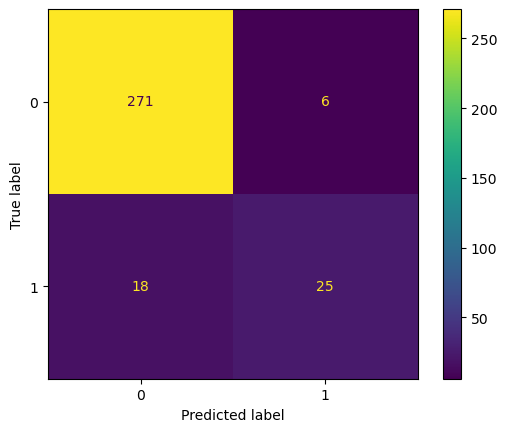

In [152]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [242]:

svc_model = SVC()

In [243]:
svc_params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [244]:
svc_classifier = GridSearchCV(svc_model, svc_params , refit = True, verbose = 3 , cv = 5 , scoring = 'accuracy')

In [245]:
svc_classifier.fit(X_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.859 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.855 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.902 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.867 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.887 total time=   0.1s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.895 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.875 total time=   0.1s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.887 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.875 total time=   0.1s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.867 total time=   0.0s


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [246]:
svc_classifier.cv_results_

{'mean_fit_time': array([0.02598329, 0.02018805, 0.01878772, 0.0173882 , 0.02938156,
        0.02618303, 0.02618246, 0.01978793, 0.01838779, 0.0175899 ,
        0.02798295, 0.03237925, 0.02678347, 0.01838841, 0.01818929,
        0.04896913, 0.03357887, 0.04557123, 0.01978755, 0.01838865,
        0.16609602, 0.05676508, 0.07975016, 0.06036267, 0.02598252]),
 'std_fit_time': array([0.00561823, 0.00193842, 0.00222635, 0.00048922, 0.0131162 ,
        0.00193685, 0.00231374, 0.0019387 , 0.00080025, 0.00080125,
        0.0021896 , 0.00279842, 0.00159889, 0.00048957, 0.001166  ,
        0.00451402, 0.00440592, 0.00515806, 0.00116516, 0.00048957,
        0.01869159, 0.00867595, 0.01660778, 0.00581411, 0.00218858]),
 'mean_score_time': array([0.0131916 , 0.01099296, 0.01059375, 0.00979395, 0.0137908 ,
        0.01139259, 0.01219306, 0.0105938 , 0.01039329, 0.01119199,
        0.01059284, 0.01159444, 0.01319118, 0.0099937 , 0.00999298,
        0.01159878, 0.01059361, 0.01259189, 0.0109942 , 0.00

In [247]:
best_parameters = svc_classifier.best_params_
best_parameters

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [248]:
accuracy_svc = svc_classifier.best_score_
print(f'Accuracy of the training set while tuning : {accuracy_svc*100}')

Accuracy of the training set while tuning : 88.34957107843138


In [249]:

svc = SVC(C = 1000, gamma = 1, kernel = 'rbf')
svc.fit(X_train , y_train)


C:\Users\Fouzia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, gamma=1)

In [250]:

y_pred = svc.predict(X_test)

In [251]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [252]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [253]:
acc_svc = accuracy_score(y_test , y_pred)
print(f'Accuracy of the testing set while tuning : {acc_svc*100}')

Accuracy of the testing set while tuning : 88.125


In [254]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       277
           1       0.62      0.30      0.41        43

    accuracy                           0.88       320
   macro avg       0.76      0.64      0.67       320
weighted avg       0.86      0.88      0.86       320



In [ ]:
# Class 0 - Bad quality wines , Class 1 - good quality wines
# For a Random Forest Classifier , the model has predicted 269 samples as true negatives (bad quality wines were predicted as bad quality) and 8 samples as false positives (bad quality wines were predicted as good quality wines)
# The model has also predicted 30 samples as false negatives (good quality wines were predicted as bad quality wines) and 13 samples were predicted as true positives (good quality wines were predicted as good quality)

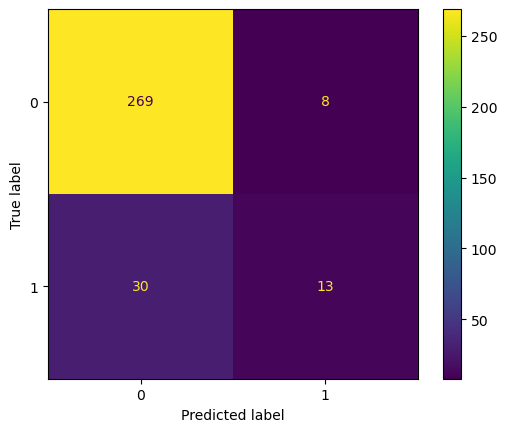

In [255]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()